In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

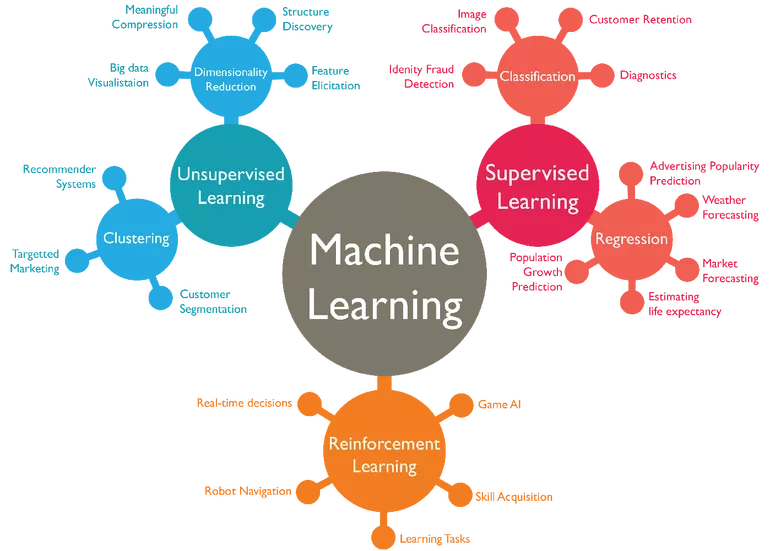

**SUPERVISED LEARNING (DENETİMLİ ÖĞRENME)**

Denetimli öğrenme, bir girdiyi örnek girdi-çıktı çiftlerine dayalı olarak çıktıyla eşleyen bir işlevi öğrenmenin makine öğrenme görevidir. Bir dizi eğitim örneğinden oluşan etiketli eğitim verilerinden bir işlevi ihlal eder.

**EXPLORATORY DATA ANALYSIS ( Keşifsel Veri Analizi ) **

Keşifsel Veri Analizi(EDA), kalıpları keşfetmek, anormallikleri tespit etmek, hipotezi test etmek ve özet istatistikler ve grafiksel gösterimler yardımıyla varsayımları kontrol etmek için veriler üzerinde ilk araştırmaların yapılması kritik sürecini ifade eder.
Öncelikle verileri anlamak ve ondan çok fazla bilgi toplamaya çalışmak iyi bir uygulamadır. EDA, verileri kirletmeden önce eldeki verileri anlamlandırmakla ilgilidir.


In [ ]:
# Bize lazım olacak küpüphaneleri alalım
import matplotlib.pyplot as plt # Grafik çizimleri için
import seaborn as sns           # Görselleştirme için

In [ ]:
data = pd.read_csv("../input/heart-disease-uci/heart.csv") # datamızı çekiyoruz.
data.head()  # datanın ilk 5 satırını görmemizi sağlar


In [ ]:
data.shape

Üstteki kodumuzu yazarak datamızını shape bilgisini öğrenebiliyoruz.
Datada 14 özellik (age,thalach vb.) ve 303 gözlem -bunlar da hasta oluyor- bulunuyor.

In [ ]:
data.info() # data ile ilgili bilgilere erişmek için

Columnlarda hiç null değer olmadığını görüyoruz.
13 column integer 1 column ise float type'a sahip


In [ ]:
data.describe()

Describe () işlevi, columnlar ile ilgili istatistiklerin bir özetini hesaplar.



In [ ]:
#Columnların birbiriyle korelasyonu
plt.figure(figsize=(15,9))
sns.heatmap(data.corr(),cmap='Blues',annot=True) 
plt.show()

Koyu tonlar pozitif korelasyonu, daha açık tonlar negatif korelasyonu temsil eder.
Burada target'in cp ile pozitif korelasyon exang ile negatif korelasyona sahip olduğunu görüyoruz.
Traget'in fbs ile nerdeyse hiç korelasyonu olmadığı gözüküyor.


**BOXPLOTS**

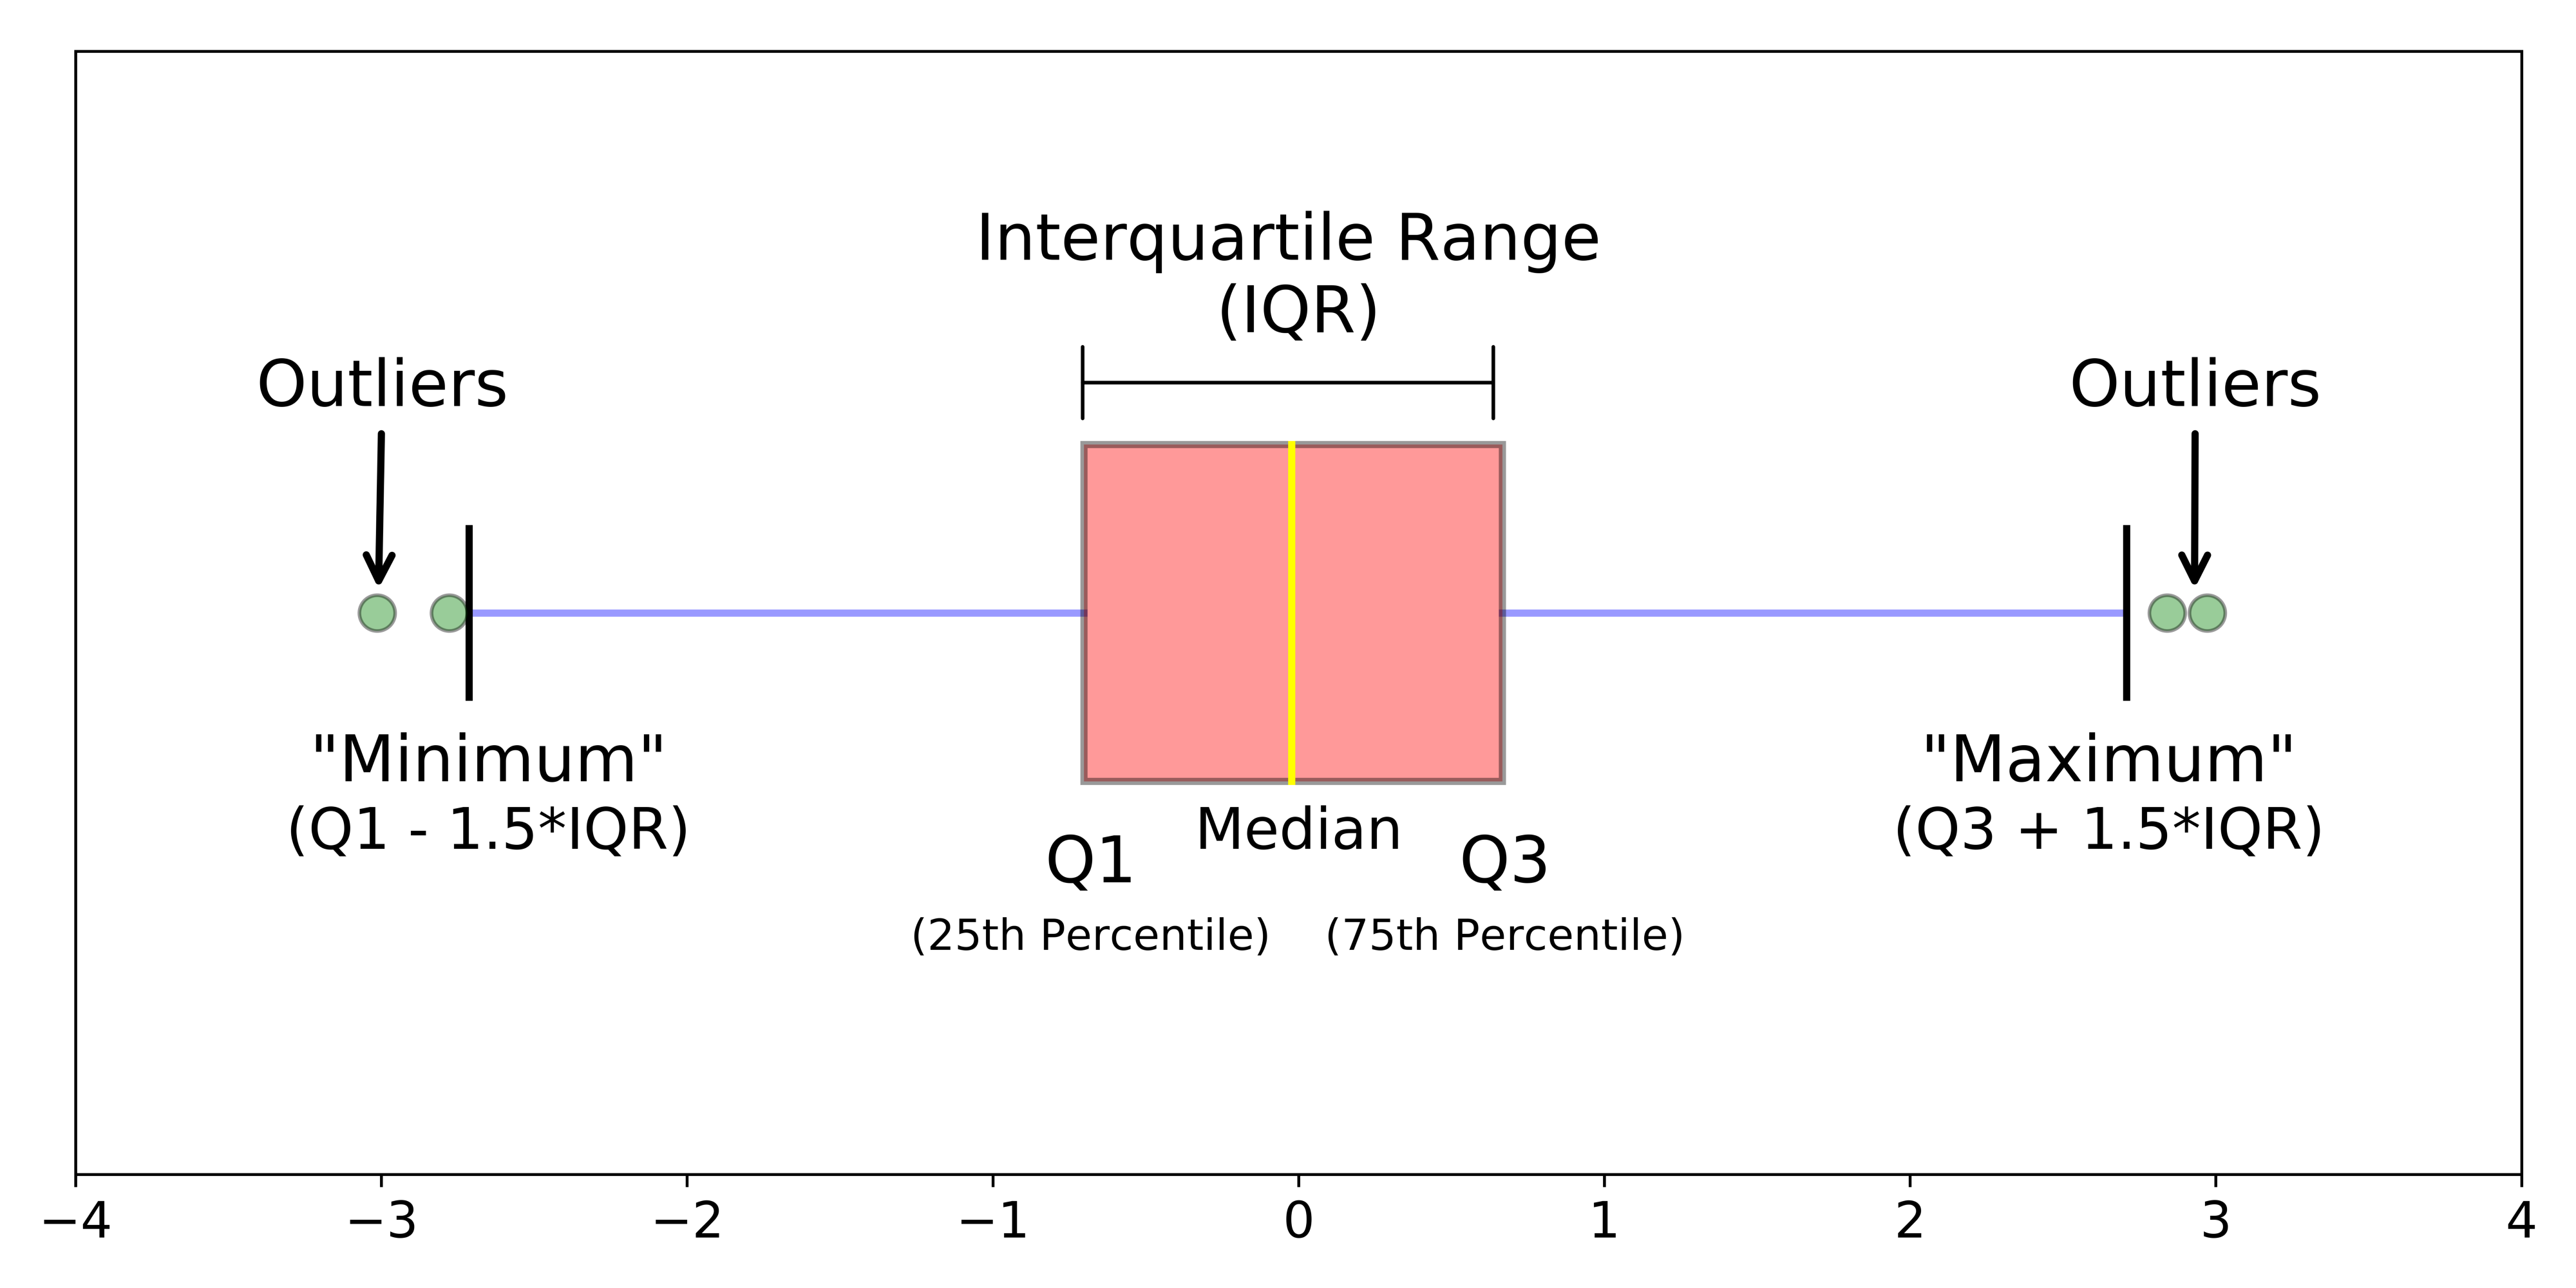

Boxplot veri dağılımını görüntülemenin  bir yoludur. Size aykırı değerleriniz ve değerlerinin ne olduğu hakkında bilgi verebilir. Ayrıca verilerinizin simetrik olup olmadığını, verilerinizin ne kadar sıkı bir şekilde gruplandığını ve verilerinizin eğri olup olmadığını ve nasıl eğildiğini size söyleyebilir.

Kutu grafikleri, beş sayı özetine (“minimum”, ilk çeyrek (Q1), median, üçüncü çeyrek (Q3) ve “maksimum”) dayalı olarak veri dağılımını görüntülemenin standart bir yoludur.


* Medyan (Q2 / 50. Yüzdelik) : veri kümesinin orta değeri.

* İlk çeyrek (Q1 / 25. Yüzde): en küçük sayı (“minimum” değil) ve veri kümesinin ortancası arasındaki orta sayı.

* Üçüncü çeyrek (Q3 / 75. Yüzdelik): veri kümesinin ortanca değeri ile en yüksek değeri (“maksimum” değil) arasındaki orta değer.

* çeyrekler arası aralık (IQR): 25. ila 75. persentil.

* whiskers (mavi renkle gösterilir)

* Outliers(aykırı değerler) : yeşil daireler olarak gösterilir.
* “Maksimum”: Q3 + 1,5 * IQR
* “Minimum”: Q1 -1,5 * IQR
* Outlier'ler verinin %7 sini oluşturur..

In [ ]:
# Boxplot
l = data.columns.values
number_of_columns=14
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(data[l[i]],color='green',orient='v')
    plt.tight_layout()


Verimizde trestbps ve chol gibi columnların outliere sahip olduğunu görüyoruz.

In [ ]:
# targetin kaç hastada olduğunu bulabiliriz.
sns.countplot(x="target", data=data)
data.loc[:,'target'].value_counts()


**K-NEAREST NEIGHBORS (KNN)**

Algoritmanın çalışmasında bir K değeri belirlenir. Bu K değerinin anlamı bakılacak eleman sayısıdır. Bir değer geldiğinde en yakın K kadar eleman alınarak gelen değer arasındaki uzaklık hesaplanır. Uzaklık hesaplandıktan sonra sıralanır ve gelen değer uygun olan sınıfa atanır.


In [ ]:
from sklearn.model_selection import train_test_split # Datamızı train ve test olarak bölüyoruz.
x,y = data.loc[:,data.columns != 'target'], data.loc[:,'target']
x_train, x_test, y_train, y_test  =train_test_split(x,y, test_size =0.3 , random_state = 42)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5) # n_neighbors : K değeridir. Bakılacak eleman sayısıdır.
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

print('K=5 için doğruluk : ',knn.score(x_test,y_test)) 


Peki en uygun K değerini nasıl bulabiliriz ?

In [ ]:
# k'yı 1'dan 25'e kadar seçiyoruz ve bizim için en uygun değeri bulalım.

aralık = np.arange(1,25)
train_dogruluk =[]
test_dogruluk = []

for i ,k in enumerate(aralık):
    knn = KNeighborsClassifier(n_neighbors=k)
    # knn ile fit ediyoruz.
    knn.fit(x_train,y_train)
    #train doğruluk
    train_dogruluk.append(knn.score(x_train, y_train))
    # test doğruluk
    test_dogruluk.append(knn.score(x_test, y_test))
    
# Şimdi doğruluk grafiğini çizdireceğiz



plt.figure(figsize=[13,8])
plt.plot(aralık, test_dogruluk, label = 'Test Doğruluğu')
plt.plot(aralık, train_dogruluk, label = 'Training Doğruluğu')
plt.legend()
plt.title('-value VS Doğruluk')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(aralık)
plt.savefig('graph.png')
plt.show()
print("En iyi doğruluk {} with K = {}".format(np.max(test_dogruluk),1+test_dogruluk.index(np.max(test_dogruluk))))

    
    

**SUPPORT VECTOR MACHİNE (SWM) CLASSİFİCATİON**

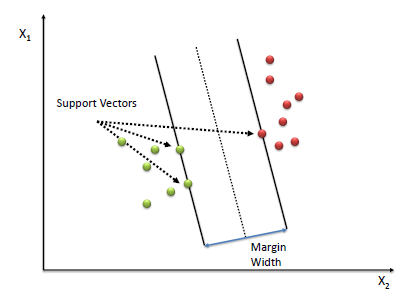

Sınıflandırma (Classification) konusunda kullanılan oldukça etkili ve basit yöntemlerden birisidir. Sınıflandırma için bir düzlemde bulunan iki grup arasında bir sınır çizilerek iki grubu ayırmak mümkündür. Bu sınırın çizileceği yer ise iki grubun da üyelerine en uzak olan yer olmalıdır. İşte SVM bu sınırın nasıl çizileceğini belirler.

Bu işlemin yapılması için iki gruba da yakın ve birbirine paralel iki sınır çizgisi çizilir ve bu sınır çizgileri birbirine yaklaştırılarak ortak sınır çizgisi üretilir.

In [ ]:
#SWM
from sklearn.svm import SVC

svc = SVC(random_state = 42)

svc.fit(x_train,y_train)

print("SWM modelinin doğrulu {}".format(svc.score(x_test,y_test)))

result = svc.predict(x_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,result)
print(cm)



**NAİVE BAYES CLASSİFİCATİON **

Naive Bayes sınıflandırıcısının temeli Bayes teoremine dayanır. lazy ( tembel ) bir öğrenme algoritmasıdır aynı zamanda dengesiz veri kümelerinde de çalışabilir. Algoritmanın çalışma şekli bir eleman için her durumun olasılığını hesaplar ve olasılık değeri en yüksek olana göre sınıflandırır. Az bir eğitim verisiyle çok başarılı işler çıkartabilir. Test kümesindeki bir değerin eğitim kümesinde gözlemlenemeyen bir değeri varsa olasılık değeri olarak 0 verir yani tahmin yapamaz. Bu durum genellikle Zero Frequency ( Sıfır Frekans ) adıyla bilinir. Bu durumu çözmek için düzeltme teknikleri kullanılabilir. En basit düzeltme tekniklerinden biri Laplace tahmini olarak bilinir.

In [ ]:
# NAİVE BAYES
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)

print("Naive Bayes modelinin doğruluğu {}".format(nb.score(x_test,y_test)))

# Confusion Matrix
result = svc.predict(x_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,result)
print(cm)

**Decision Tree**
 
Decision Tree'nin amacı veri özelliklerinden basit kurallar çıkarıp bu kuralları öğrenerek bir değişkenin değerini tahmin eden modeli oluşturmaktır.

In [ ]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42)

dtc.fit(x_train,y_train)

result = dtc.predict(x_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,result)
print(cm)

print("Decision Tree modeli doğruluk oranı {}".format(dtc.score(x_test,y_test)))

**Random Forest **

Çalışma mantığı birden fazla karar ağacı oluşturur. Bir sonuç üreteceği zaman bu karar ağaçlarındaki ortalama değer alınır ve sonuç üretilir.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# RandomForestClassifier sınıfını import ettik

rf = RandomForestClassifier (n_estimators =100 , random_state = 42) 
# n_estimators = Oluşturulacak karar ağacı sayısıdır. Değiştirildiğinde başarı oranıda değişir.
rf.fit(x_train,y_train)

print("Random Forest modeli Doğruluğu {}".format(rf.score(x_test,y_test)))


**Logistic Regression**

Logistic Regression sınıflandırma işlemi yapmaya yarayan bir regresyon yöntemidir. Kategorik veya sayısal verilerin sınıflandırılmasında kullanılır. Bağımlı değişkenin yani sonucun sadece 2 farklı değer alabilmesi durumda çalışır. 

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression


#normalizition
x = (x - np.min(x))/(np.max(x)-np.min(x)).values
from sklearn.model_selection import train_test_split # Datamızı train ve test olarak bölüyoruz.
x,y = data.loc[:,data.columns != 'target'], data.loc[:,'target']
x_train, x_test, y_train, y_test  =train_test_split(x,y, test_size =0.3 , random_state = 42)


lr = LogisticRegression(random_state=42)
lr.fit(x_train,y_train)

print("Logistic Regression modeli doğruluğu {}".format(lr.score(x_test,y_test)))



**Classification modellerinin karşılaştırılması**

* KNN modeli           : 0.6923
* SWM modeli           : 0.7032
* Naive Bayes modeli   : 0.8351
* Decision Tree modeli : 0.73626
* Random Forest modeli : 0.8241
* Logistic Regression modeli : 0.81318

Görüldüğü üzere datasetimiz için en uygun modelin Naive Bayes modeli olduğunu görmüş olduk.


Beğenilerinizi ve Eleştirilerinizi bekliyorum.
Teşekkürler !
